In [1]:
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Function to display an image
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

<p>Now lets load up the data.</p>

In [3]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
train_x.shape

(60000, 28, 28)

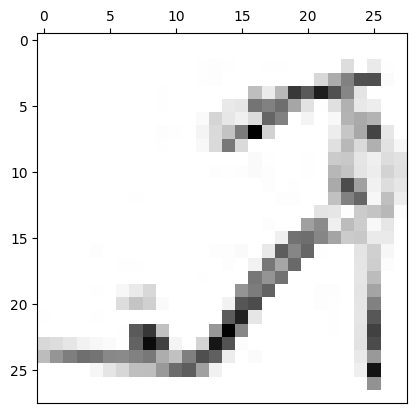

In [5]:
# Show an image using the show function.
show(train_x[8])

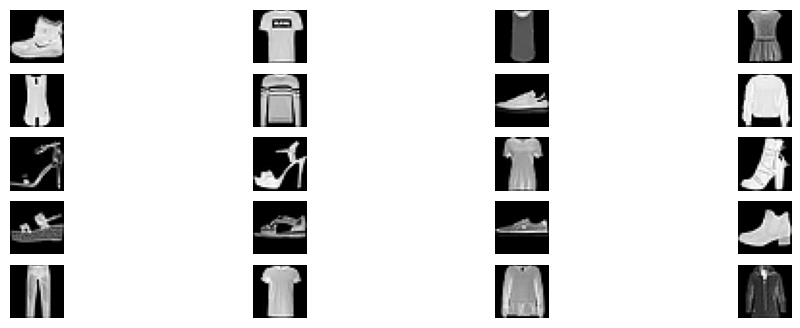

In [6]:

# Show images in the data
import matplotlib.pyplot as plt
import numpy as np

# train_x is a list or array of images
num_images_to_display = 20  # Display the first 20 images
images_to_display = train_x[:num_images_to_display]  # Select the first 20 images

# Calculate the number of rows and columns for the 5x4 grid
num_rows = 5  # Number of rows in the grid
num_columns = 4  # Number of columns in the grid

# Create a subplot grid for displaying images
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4))  # Figure size

# Loop through and display the selected images
for i, ax in enumerate(axes.flat):
    ax.imshow(images_to_display[i], cmap='gray')  # Images are grayscale
    ax.axis('off')  # Turn off axis labels

plt.show()



In [7]:
# Make the console wide enough to read all the pixels.
np.core.arrayprint._line_width = 5
# Print the matrix of values in the first image
print(train_x[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

<p>Now that we've imported the data, we'll need to start importing what we need from Keras to build our network. Below is a basic network. Note that the images are greyscale, so there is no color channel like there is in some of the other datasets.</p>

<p>Also, since there's no color channel, we'll use "1D" layers not "2D" layers as are used when we have channels for colors.</p>

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

<p>Now it's time for us to start building the network. Build below is a sample network you can play with as a starting point for your assignment. Feel free to expand on this, or start your own from scratch!</p>

In [9]:
# First Layer
model = Sequential()
model.add(Conv1D(filters = 256, kernel_size = 5, input_shape = (28, 28)))
model.add(MaxPooling1D(pool_size = 3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Second Layer
model.add(Conv1D(filters = 200, kernel_size = 5))
model.add(MaxPooling1D(pool_size = 3))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Third Layer
#model.add(Conv1D(filters = 64, kernel_size = 2))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(Dropout(0.3))
#model.add(BatchNormalization())

# Flaten the model
model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [11]:
model.fit(train_x, train_y, epochs = 40, batch_size = 20000)

Epoch 1/40
3/3 [==============================] - 10s 238ms/step - loss: 2.7750 - accuracy: 0.1342
Epoch 2/40
3/3 [==============================] - 1s 238ms/step - loss: 2.7585 - accuracy: 0.1353
Epoch 3/40
3/3 [==============================] - 1s 245ms/step - loss: 2.7482 - accuracy: 0.1375
Epoch 4/40
3/3 [==============================] - 1s 244ms/step - loss: 2.7363 - accuracy: 0.1403
Epoch 5/40
3/3 [==============================] - 1s 237ms/step - loss: 2.7233 - accuracy: 0.1419
Epoch 6/40
3/3 [==============================] - 1s 237ms/step - loss: 2.7037 - accuracy: 0.1451
Epoch 7/40
3/3 [==============================] - 1s 238ms/step - loss: 2.7027 - accuracy: 0.1451
Epoch 8/40
3/3 [==============================] - 1s 236ms/step - loss: 2.6830 - accuracy: 0.1505
Epoch 9/40
3/3 [==============================] - 1s 240ms/step - loss: 2.6682 - accuracy: 0.1478
Epoch 10/40
3/3 [==============================] - 1s 241ms/step - loss: 2.6697 - accuracy: 0.1524
Epoch 11/40
3/3 [=

<p>Now that we've trained the network, lets see how well it works on some unseen data!</p>

In [12]:
score = model.evaluate(test_x, test_y)
print('\nloss is: ' + str(score[0]))
print('accuracy is: ' + str(score[1]))

313/313 [==============================] - 2s 4ms/step - loss: 1.8814 - accuracy: 0.3242

loss is: 1.8813867568969727
accuracy is: 0.32420000433921814


In [13]:
# Print the first layer
print(model.layers[0])

In [14]:
# Print the initial input shape
print(model.layers[0].input_shape)

(None, 28, 28)


In [15]:
# By using the .output_shape method, we can see the impact that layer has on the dimensions of our matrix.
# Oh look - the final dimension is now the same as our "kernel_size" argument.
# and we lost 1 from the original rows argument.
print(model.layers[0].output_shape)

(None, 24, 256)


313/313 [==============================] - 1s 3ms/step


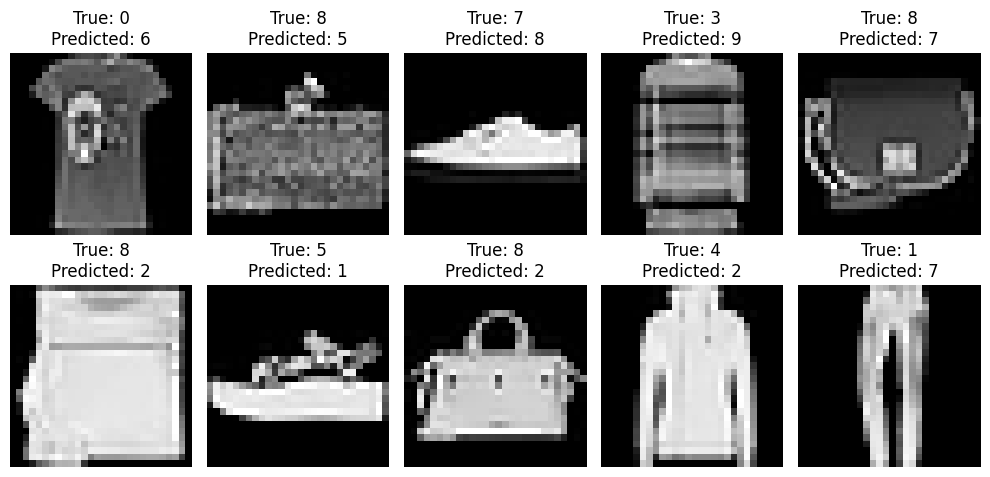

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions using the trained model on the test data
predictions = model.predict(test_x)

# Convert one-hot encoded predictions back to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y, axis=1)

# Calculate errors
errors = (predicted_labels != true_labels)

# Get the indices of misclassified examples
misclassified_indices = np.where(errors)[0]

# Plot a random sample of misclassified images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = np.random.choice(misclassified_indices)
    plt.imshow(test_x[index], cmap='gray')
    plt.title(f'True: {true_labels[index]}\nPredicted: {predicted_labels[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Epoch 1/20
375/375 [==============================] - 5s 8ms/step - loss: 2.6486 - accuracy: 0.1972 - val_loss: 1.9168 - val_accuracy: 0.3690
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 1.9389 - accuracy: 0.3458 - val_loss: 1.4621 - val_accuracy: 0.4905
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 1.5555 - accuracy: 0.4552 - val_loss: 1.2104 - val_accuracy: 0.5506
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 1.3434 - accuracy: 0.5227 - val_loss: 1.0629 - val_accuracy: 0.5966
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 1.2086 - accuracy: 0.5740 - val_loss: 0.9677 - val_accuracy: 0.6403
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 1.1192 - accuracy: 0.6044 - val_loss: 0.9028 - val_accuracy: 0.6687
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 1.0589 - accuracy: 0.6273 - val_loss: 0.8555 - val_accuracy: 0.6899
Epoch 

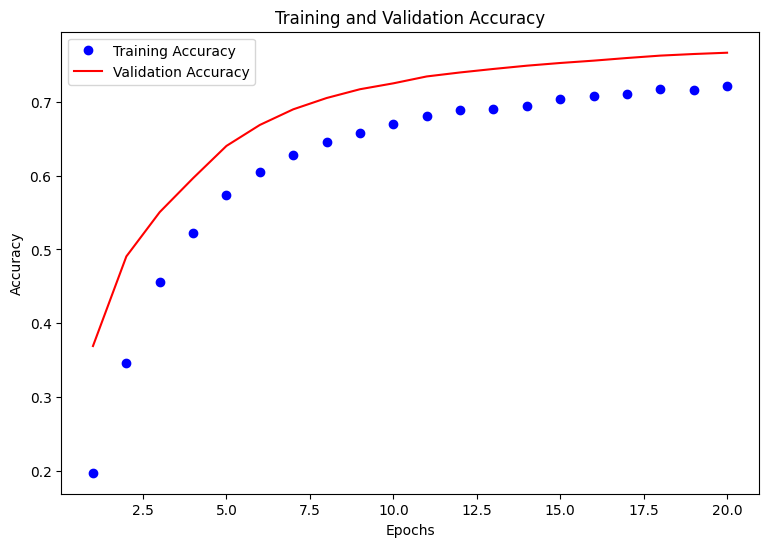

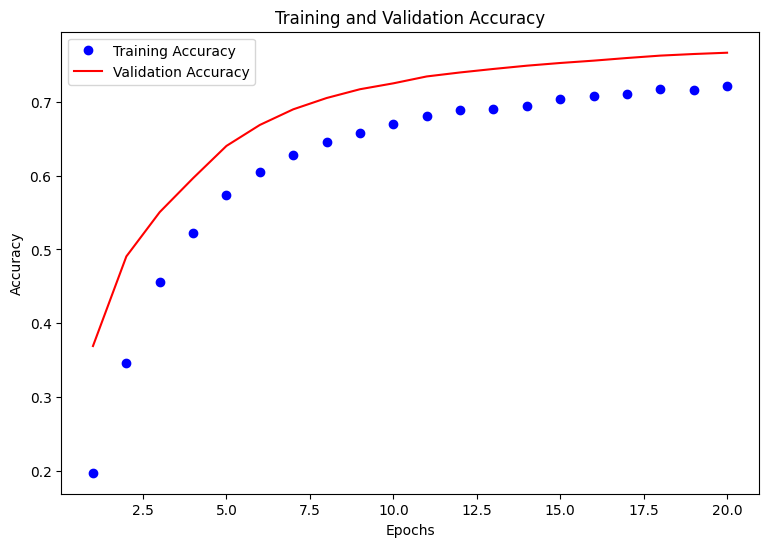

In [17]:
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

# First Layer
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, input_shape=(28, 28)))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Second Layer (You can uncomment and modify this layer if needed)
model.add(Conv1D(filters=128, kernel_size=5))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Third Layer (You can uncomment and modify this layer if needed)
# model.add(Conv1D(filters=64, kernel_size=1))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())

# Flatten the model
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model and collect loss values
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create an accuracy plot line graph
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(9, 6))
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Create an accuracy plot line graph
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(9, 6))
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')  # Corrected line style
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/60
375/375 [==============================] - 4s 6ms/step - loss: 2.7548 - accuracy: 0.1286 - val_loss: 1.9537 - val_accuracy: 0.2834
Epoch 2/60
375/375 [==============================] - 2s 5ms/step - loss: 1.9705 - accuracy: 0.3043 - val_loss: 1.4566 - val_accuracy: 0.5038
Epoch 3/60
375/375 [==============================] - 3s 7ms/step - loss: 1.5764 - accuracy: 0.4412 - val_loss: 1.2197 - val_accuracy: 0.5751
Epoch 4/60
375/375 [==============================] - 2s 6ms/step - loss: 1.3554 - accuracy: 0.5192 - val_loss: 1.0839 - val_accuracy: 0.6180
Epoch 5/60
375/375 [==============================] - 2s 5ms/step - loss: 1.2259 - accuracy: 0.5682 - val_loss: 0.9944 - val_accuracy: 0.6436
Epoch 6/60
375/375 [==============================] - 2s 5ms/step - loss: 1.1325 - accuracy: 0.6018 - val_loss: 0.9310 - val_accuracy: 0.6646
Epoch 7/60
375/375 [==============================] - 2s 5ms/step - loss: 1.0672 - accuracy: 0.6243 - val_loss: 0.8805 - val_accuracy: 0.6842
Epoch 

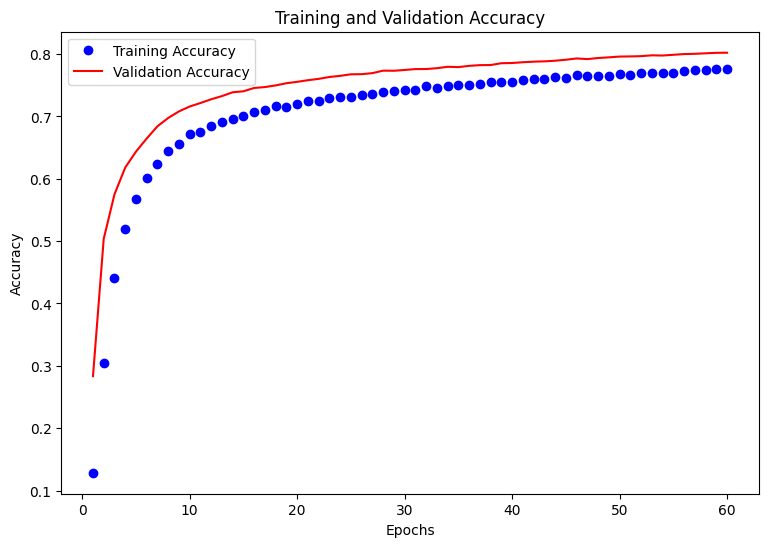

Test Accuracy: 78.89%


In [18]:
import numpy as np
import pandas as pd
import os
import tarfile
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense

# First Layer
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, input_shape=(28, 28)))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Second Layer (You can uncomment and modify this layer if needed)
model.add(Conv1D(filters=128, kernel_size=5))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Third Layer (You can uncomment and modify this layer if needed)
# model.add(Conv1D(filters=64, kernel_size=1))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())

# Flatten the model
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model and collect loss values
history = model.fit(train_x, train_y, epochs=60, batch_size=128, validation_split=0.2)

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(test_x, test_y)

# Create an accuracy plot line graph
epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(9, 6))
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
